In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [22]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/latest_most_targets/LPR/240_timepoints


In [23]:
# mac       - phase I && II - LPR - after_merging - 240 variables
# made on 4/28/2021 in constance
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/wide/04_28_2021/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_240_timepoints_wide_full.csv'

# mac       - phase I && II - LPR - after_merging -  15 variables
# made on 4/28/2021 in constance
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/wide/04_28_2021/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_15_timepoints_wide_full.csv'

# 53 chemical.id
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/before_merging/wide/df_per_chemical_53_tall_wide_t0_t239.csv'

# 1030 chemical.id
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/wide/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_wide_t0_t239_1030.csv'

df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17
0,163.0,1,A1,163_1_A1,64.0000,0.9,0.0,1.3,0.0,0.3,0.1,0.0,52.0,0.0,0.0,0.0,19.9,20.8,12.6,12.3
1,163.0,1,A10,163_1_A10,0.0640,31.0,23.2,0.0,0.0,3.3,28.2,0.0,0.0,0.0,0.0,0.0,15.7,50.3,0.0,0.0
2,163.0,1,A11,163_1_A11,0.0064,4.7,30.7,60.0,38.4,34.7,0.0,26.9,8.8,56.4,9.8,37.1,1.4,50.6,0.0,4.2
3,163.0,1,A12,163_1_A12,0.0000,68.9,40.8,4.4,1.5,19.5,10.3,16.7,81.1,4.6,18.5,0.6,0.0,0.0,38.3,0.3
4,163.0,1,A2,163_1_A2,6.4000,0.1,42.9,0.9,90.6,23.4,29.0,49.4,6.2,29.7,59.2,17.5,1.2,25.0,16.3,39.7


In [25]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
display(np.unique(df_lpr['chemical.id']))
display(df_lpr.head())

df_per_chemical = df_lpr.loc[df_lpr['chemical.id'] == "-9223372036854775808"]
display(df_per_chemical.head())

149

array(['-9223372036854775808', '1119', '1167', '1183', '1187', '1268',
       '1271', '1273', '1310', '1327', '1363', '1383', '1391', '1450',
       '1454', '1455', '1532', '1535', '1540', '1600', '1606', '1608',
       '1627', '163', '1631', '165', '1664', '1666', '1677', '1689',
       '1694', '1704', '1706', '172', '176', '1762', '1764', '1771',
       '1790', '1796', '1807', '1808', '1809', '1816', '1827', '1845',
       '1846', '1853', '1890', '1906', '1912', '1929', '1944', '1961',
       '1968', '197', '1982', '2098', '2103', '2104', '2105', '2137',
       '2141', '2154', '2156', '2159', '2165', '2185', '2186', '2187',
       '2191', '2371', '2373', '2374', '2406', '2411', '2413', '2414',
       '2415', '2417', '2432', '2467', '2496', '2506', '2573', '2596',
       '2638', '2655', '2657', '2661', '2686', '2688', '2691', '2706',
       '2723', '2726', '2743', '2752', '2772', '2827', '2849', '2877',
       '2886', '2893', '2896', '2960', '2989', '3009', '3012', '3022',
       '305

,chemical.id,plate.id,well,chemical_plate_well,conc,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17
23233,-9223372036854775808,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23235,-9223372036854775808,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.5,35.8,43.5,0.2,0.0,4.0,7.1,5.4
23237,-9223372036854775808,NaN,NaN,NaN,NaN,0.0,1.4,43.6,0.0,0.0,31.9,0.2,71.2,109.0,149.3,73.8,0.0,0.0,30.8,4.3
23239,-9223372036854775808,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.8,0.0,0.0,20.7,76.3,48.7,116.2,103.9,91.9,106.8,59.8
23241,-9223372036854775808,NaN,NaN,NaN,NaN,0.0,0.0,47.8,19.4,75.7,3.5,163.0,0.0,0.0,26.9,0.0,0.0,9.2,21.0,51.1


,chemical.id,plate.id,well,chemical_plate_well,conc,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17
0,163,1,A1,163_1_A1,64.0000,0.9,0.0,1.3,0.0,0.3,0.1,0.0,52.0,0.0,0.0,0.0,19.9,20.8,12.6,12.3
1,163,1,A10,163_1_A10,0.0640,31.0,23.2,0.0,0.0,3.3,28.2,0.0,0.0,0.0,0.0,0.0,15.7,50.3,0.0,0.0
2,163,1,A11,163_1_A11,0.0064,4.7,30.7,60.0,38.4,34.7,0.0,26.9,8.8,56.4,9.8,37.1,1.4,50.6,0.0,4.2
3,163,1,A12,163_1_A12,0.0000,68.9,40.8,4.4,1.5,19.5,10.3,16.7,81.1,4.6,18.5,0.6,0.0,0.0,38.3,0.3
4,163,1,A2,163_1_A2,6.4000,0.1,42.9,0.9,90.6,23.4,29.0,49.4,6.2,29.7,59.2,17.5,1.2,25.0,16.3,39.7


In [5]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

2

array(['9289', '9290'], dtype=object)

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,53,9289,A01,53_9289.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,9289,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,14.1,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6
2,53,9289,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9
3,53,9289,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,9289,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,13.7,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9


In [6]:
'''
# devel -> keep few chemicals for faster exploration of negative effect

chemical_id_from_here = np.unique(df_lpr['chemical.id'])

randomly_chosen = random.sample(set(chemical_id_from_here), 1)
chemical_id_from_here = []
for i in range(len(randomly_chosen)):
    chemical_id_from_here.append(randomly_chosen[i])    

chemical_id_from_here = ['1030', '53']
#chemical_id_from_here = ['53']
    
df_lpr_part = pd.DataFrame()

for chemical_id in chemical_id_from_here:
    print ("\n\nchemical_id:", chemical_id)
    df_per_chemical = df_lpr.loc[df_lpr['chemical.id'] == chemical_id]
    #display(df_per_chemical.tail())
    display(len(df_per_chemical))
    df_lpr_part = pd.concat([df_lpr_part, df_per_chemical], axis = 1)
    #display (df_lpr_part.tail())
    display(len(df_lpr_part))

#print ("\n\n")
#display(len(df_lpr_part))
#display (df_lpr_part.head())
display (df_lpr_part.tail())

df_lpr_part.to_csv("df_lpr_part.csv",index=False)'''

'\n# devel -> keep few chemicals for faster exploration of negative effect\n\nchemical_id_from_here = np.unique(df_lpr[\'chemical.id\'])\n\nrandomly_chosen = random.sample(set(chemical_id_from_here), 1)\nchemical_id_from_here = []\nfor i in range(len(randomly_chosen)):\n    chemical_id_from_here.append(randomly_chosen[i])    \n\nchemical_id_from_here = [\'1030\', \'53\']\n#chemical_id_from_here = [\'53\']\n    \ndf_lpr_part = pd.DataFrame()\n\nfor chemical_id in chemical_id_from_here:\n    print ("\n\nchemical_id:", chemical_id)\n    df_per_chemical = df_lpr.loc[df_lpr[\'chemical.id\'] == chemical_id]\n    #display(df_per_chemical.tail())\n    display(len(df_per_chemical))\n    df_lpr_part = pd.concat([df_lpr_part, df_per_chemical], axis = 1)\n    #display (df_lpr_part.tail())\n    display(len(df_lpr_part))\n\n#print ("\n\n")\n#display(len(df_lpr_part))\n#display (df_lpr_part.head())\ndisplay (df_lpr_part.tail())\n\ndf_lpr_part.to_csv("df_lpr_part.csv",index=False)'

## Load morphological data for filtering wells that have dead fish

In [7]:
#mac       - phase I && II - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/morpho/wide/2_after_fixing_MO24/zf_morphology_data_335_chemicals_2020DEC16_fixed_wide_DNC_0_full.csv'

#constance - phase I && II - full
#morph_data_file_complete_path = '/people/kimd999/tox/phase_I_II/morpho/wide/zf_morphology_data_335_chemicals_2020DEC16_wide_DNC_0.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,...,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


69395

In [8]:
display(df_lpr[:20].head())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,53,9289,A01,53_9289.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53,9289,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,14.1,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6
2,53,9289,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9
3,53,9289,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53,9289,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,13.7,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9


In [9]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# -> 8 seconds for 1 chemical

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())
print("\ndf_lpr.shape:" + str(df_lpr.shape)) #(11,184,240, 7)


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]
#display('df_lpr_filtered.head()',df_lpr_filtered.head())
print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") #(8,309,280, 7)

#display(df_morpho_nonna_plate_well[0:5])
print ("\n")
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) # 8 seconds took for 1 chemical

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,53,9289,A01,53_9289.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53_9289_A01
1,53,9289,A02,53_9289.0_A02,35.6,7.2,0.0,0.0,0.0,0.0,...,15.2,17.3,17.5,10.6,13.4,9.1,11.2,11.7,10.6,53_9289_A02
2,53,9289,A03,53_9289.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,13.9,12.9,0.0,11.5,12.9,9.2,13.1,3.0,7.9,53_9289_A03
3,53,9289,A04,53_9289.0_A04,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53_9289_A04
4,53,9289,A05,53_9289.0_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,18.1,7.1,10.3,8.3,17.5,12.3,13.9,10.8,15.9,53_9289_A05



df_lpr.shape:(192, 246)
df_lpr_filtered.shape:(184, 246)



Done, it took:8.1 seconds


In [10]:
# [Goal] 
# Convert time resolution to minutes (if applicable)
# For LPR, 240 timepoints -> 24 timepoints
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# -> 0.5 seconds for 1 chemical

start_time = time.time()

#df_lpr_min = df_lpr_filtered_no_na[['chemical.id', 'conc', 'plate.id', 'well']]
df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]

print ("(before transforming for 1 minute interval) df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 4)
#display(df_lpr_min.head())
#display(df_lpr_min.tail())

time_index_sec_start = 5
max_time_index_sec   = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)
    
for time_index in range(int(max_time_index_sec / group_size)):
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    if (report):
        print ("\ntime_index:" + str(time_index))
        print ("start_index:"  + str(start_index))
        print ("end_index:"    + str(end_index))
        
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
        # print ("df_lpr_min_in_this_time_index.shape:\n" + str(df_lpr_min_in_this_time_index.shape))
        # display(df_lpr_min_in_this_time_index.head())
        # display(df_lpr_min_in_this_time_index.tail())
        # display(df_lpr_min_in_this_time_index)
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
    
    #display(df_lpr_min.head())
    #display(df_lpr_min.tail())
    
pd.set_option('display.max_columns', None)

print ("(after transforming for 1 minute interval)  df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 28)
#display(df_lpr_min.head())

#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

cwd = os.getcwd()
print (cwd)
df_lpr_min.to_csv("df_lpr_min.csv",index=False)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time interval is done. It took "+str(time_took))
# -> 0.5 seconds for 1 chemical

(before transforming for 1 minute interval) df_lpr_min.shape:(184, 4)
interval:1 min
(after transforming for 1 minute interval)  df_lpr_min.shape:(184, 28)
/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/latest_most_targets/LPR/240_timepoints
Conversion of time interval is done. It took 0.1 seconds


In [11]:
####### stop here
a=b

NameError: name 'b' is not defined

df_lpr_min.shape:(184, 29)


184

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
1,53,35.6,9289,A02,7.2,0.0,0.0,167.2,132.2,124.7,12.7,0.0,0.0,130.9,117.2,125.3,50.5,0.0,0.0,30.4,0.0,127.2,110.5,13.7,11.2,27.1,120.4,130.7,53_35.6
2,53,11.2,9289,A03,0.0,0.0,0.8,1.8,19.2,17.3,4.7,5.4,5.3,28.4,26.2,4.4,41.3,0.0,0.0,10.9,28.6,40.4,71.0,11.4,1.2,0.0,72.9,84.4,53_11.2
3,53,5.0,9289,A04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53_5.0
4,53,1.0,9289,A05,0.0,17.1,1.8,162.2,110.3,86.0,33.6,0.0,0.0,100.9,101.3,102.0,59.1,0.0,0.0,17.0,128.1,111.7,112.0,64.0,0.0,0.0,90.0,127.9,53_1.0
6,53,50.0,9289,A07,0.0,0.0,1.0,27.9,83.0,174.9,9.4,6.6,0.0,32.5,67.8,33.1,69.7,0.0,9.8,28.6,6.4,61.8,8.7,24.4,12.5,1.4,51.5,6.5,53_50.0
7,53,35.6,9289,A08,0.0,0.0,23.3,93.3,103.3,180.9,69.7,0.0,1.0,176.6,116.4,141.8,33.1,0.0,0.0,27.5,57.4,0.6,0.0,5.8,0.0,0.0,81.9,23.1,53_35.6
8,53,11.2,9289,A09,0.2,5.5,0.0,36.7,9.8,101.3,0.0,0.0,7.8,110.4,82.4,100.5,91.9,4.1,3.7,0.0,75.4,89.9,7.7,29.6,0.0,0.0,20.8,0.0,53_11.2
9,53,5.0,9289,A10,0.0,1.2,0.0,142.9,110.0,95.6,31.0,0.0,0.0,107.1,120.9,97.7,62.4,3.4,2.0,8.6,99.1,95.5,87.7,50.8,0.0,0.0,99.8,93.3,53_5.0
10,53,1.0,9289,A11,0.9,1.5,0.0,58.5,47.5,123.4,76.9,0.0,2.4,54.4,82.4,166.0,164.0,1.1,0.0,0.0,53.6,86.3,71.4,55.0,0.0,31.6,3.2,0.0,53_1.0
11,53,0.0,9289,A12,0.0,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0,13.6,0.0,0.0,0.0,0.0,0.0,0.0,34.3,0.0,19.1,0.0,0.8,0.0,43.2,47.8,53_0.0


/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/latest_most_targets/LPR/240_timepoints
df_per_chemical_53_tall_wide_t0_t239_all_conc.png


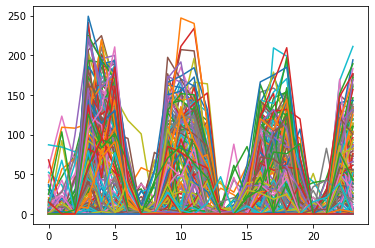

In [12]:
# Plot few lpr curves to check transition points
# all concentrations
time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

print ("df_lpr_min.shape:" + str(df_lpr_min.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (df_lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_lpr_min.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(df_lpr_min.iloc[:,time_index_start:time_index_start + num_time_points].values));
#ax.plot(np.transpose(df_lpr_min.iloc[:,time_index_start:time_index_start+5].values));
display(len(df_lpr_min))
display(df_lpr_min.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_all_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
plt.savefig(output_filename, bbox_inches="tight")

In [13]:
## calculate MOV, AUC for all chemical concentrations

delta = df_lpr_min[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#delta -> delta_mov_auc

trans_points = [2,8,14,20] # "official"

end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
#    print ("\ntrans_index:" + str(trans_index))
    print ("trans_point:" + str(trans_point))
    
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta['MOV' + str(trans_index + 1)] = df_lpr_min['t' + str(trans_point + 1)] - df_lpr_min['t' + str(trans_point)]
        else:
            delta['AUC' + str(trans_index + 1)] \
            = sum(df_lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(df_lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))

display(delta.head(1))
delta.to_csv("delta_mov_auc.csv", index=False)

trans_point:2
trans_point:8
trans_point:14
trans_point:20


,chemical.id,conc,plate.id,well,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3,MOV4,AUC4
1,53,35.6,9289,A02,167.2,416.9,130.9,360.7,30.4,107.1,15.9,142.8


In [ ]:
# 0 concentration

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

#df_part_0_conc = df_lpr_min_part.loc[df_lpr_min_part['conc'] == 0]
df_0_conc = df_lpr_min.loc[df_lpr_min['conc'] == 0]

print ("df_0_conc.shape:" + str(df_0_conc.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_0_conc.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(df_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
display(len(df_0_conc))
display(df_0_conc.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_0_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
plt.savefig(output_filename, bbox_inches="tight")

In [ ]:
chemical_id_from_here = [1030]
    
df_lpr_min_part = pd.DataFrame()

for chemical_id in chemical_id_from_here:
    print ("\n\nchemical_id:", chemical_id)
    df_per_chemical = df_lpr_min.loc[df_lpr_min['chemical.id'] == chemical_id]
    display(df_per_chemical.tail())

    df_lpr_min_part = pd.concat([df_lpr_min_part, df_per_chemical], axis = 1)
    display (df_lpr_min_part.tail())


In [ ]:
'''## identify biggest change of peaks in each ccp
#0-5,
#6-11,
#12-17,
#18-23
trans_points = [2,8,14,20] # "official"

df_lpr_min_ccp = df_lpr_min.copy()
df_lpr_min_ccp.insert(0, 'chemical_conc_plate', df_lpr_min.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))

arr_max_index_per_trans_2 = []
arr_max_index_per_trans_8 = []
arr_max_index_per_trans_14 = []
arr_max_index_per_trans_20 = []

for ccp in np.unique(df_lpr_min_ccp.chemical_conc_plate):
    #print (str(ccp))
    per_ccp = df_lpr_min_ccp.loc[df_lpr_min_ccp.chemical_conc_plate == ccp,:]
    #display(per_ccp.head())
    #display(len(per_ccp))
    #display(per_ccp.tail())
    
    former_timepoints_mean = 999
    for trans_index, trans_point in enumerate(trans_points):
        arr_diff = []
        #print ("trans_point:" + str(trans_point))
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            values = per_ccp[current_timepoint]
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        max_value = max(arr_diff)
        max_index = arr_diff.index(max_value)
        #print (max_index)

        if (trans_point == 2):
            arr_max_index_per_trans_2.append(max_index)
        elif (trans_point == 8):
             arr_max_index_per_trans_8.append(max_index)
        elif (trans_point == 14):
            arr_max_index_per_trans_14.append(max_index)
        else: # (trans_point == 20):
            arr_max_index_per_trans_20.append(max_index)
        
f_out.close()
print ("analysis done")'''

In [ ]:
# draw
unique_counts = np.unique(arr_max_index_per_trans_2)
x_2 = []
y_2 = []
for i in range(len(unique_counts)):
    x_2.append(unique_counts[i])
    count = arr_max_index_per_trans_2.count(unique_counts[i])
    y_2.append(count)

unique_counts = np.unique(arr_max_index_per_trans_8)
x_8 = []
y_8 = []
for i in range(len(unique_counts)):
    x_8.append(unique_counts[i])
    count = arr_max_index_per_trans_8.count(unique_counts[i])
    y_8.append(count)

unique_counts = np.unique(arr_max_index_per_trans_14)
x_14 = []
y_14 = []
for i in range(len(unique_counts)):
    x_14.append(unique_counts[i])
    count = arr_max_index_per_trans_14.count(unique_counts[i])
    y_14.append(count)

unique_counts = np.unique(arr_max_index_per_trans_20)
x_20 = []
y_20 = []
for i in range(len(unique_counts)):
    x_20.append(unique_counts[i])
    count = arr_max_index_per_trans_20.count(unique_counts[i])
    y_20.append(count)
    
alpha=0.5
plt.bar(x_2, y_2, color ='maroon', width = 0.3, alpha=alpha)
plt.bar(np.array(x_8)+0.15, y_8, color ='red', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.3, y_14, color ='green', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.45, y_20, color ='blue', width = 0.3,alpha=alpha)
    
plt.xlabel("timepoint with highest increase of peak")
plt.ylabel("count")
plt.title("maroon->2, red->8, green->14, blue->20")
plt.show()


In [ ]:
if 'chemical_conc' in df_0_conc.columns:
    df_0_conc = df_0_conc.drop(columns='chemical_conc')
    
if 'chemical_conc_plate' in df_0_conc.columns:
    df_0_conc = df_0_conc.drop(columns='chemical_conc_plate')

In [ ]:
## identify biggest change of peaks in each ccp
#0-5,
#6-11,
#12-17,
#18-23
trans_points = [2,8,14,20] # "official"

df_0_conc_ccp = df_0_conc.copy()
df_0_conc_ccp.insert(0, 'chemical_conc_plate', df_0_conc.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))
display(df_0_conc_ccp.head())

f_out = open("report.txt","w+")
arr_max_index_per_trans_2 = []
arr_max_index_per_trans_8 = []
arr_max_index_per_trans_14 = []
arr_max_index_per_trans_20 = []

for ccp in np.unique(df_0_conc_ccp.chemical_conc_plate):
    #print (str(ccp))
    per_ccp = df_0_conc_ccp.loc[df_0_conc_ccp.chemical_conc_plate == ccp,:]
    #display(per_ccp.head())
    #display(len(per_ccp))
    #display(per_ccp.tail())
    
    former_timepoints_mean = 999
    for trans_index, trans_point in enumerate(trans_points):
        arr_diff = []
        #print ("trans_point:" + str(trans_point))
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            values = per_ccp[current_timepoint]
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        max_value = max(arr_diff)
        max_index = arr_diff.index(max_value)
        #print (max_index)
        unique_ccp = np.unique(per_ccp['chemical_conc_plate'])
        save_this = unique_ccp[0]
        save_this = save_this + " trans_point: " + str(trans_point) + " " + str(max_index) + "\n"
        f_out.write(save_this)
        if (trans_point == 2):
            arr_max_index_per_trans_2.append(max_index)
        elif (trans_point == 8):
             arr_max_index_per_trans_8.append(max_index)
        elif (trans_point == 14):
            arr_max_index_per_trans_14.append(max_index)
        else: # (trans_point == 20):
            arr_max_index_per_trans_20.append(max_index)
        
f_out.close()
print ("analysis done")


In [ ]:
# draw
unique_counts = np.unique(arr_max_index_per_trans_2)
x_2 = []
y_2 = []
for i in range(len(unique_counts)):
    x_2.append(unique_counts[i])
    count = arr_max_index_per_trans_2.count(unique_counts[i])
    y_2.append(count)

unique_counts = np.unique(arr_max_index_per_trans_8)
x_8 = []
y_8 = []
for i in range(len(unique_counts)):
    x_8.append(unique_counts[i])
    count = arr_max_index_per_trans_8.count(unique_counts[i])
    y_8.append(count)

unique_counts = np.unique(arr_max_index_per_trans_14)
x_14 = []
y_14 = []
for i in range(len(unique_counts)):
    x_14.append(unique_counts[i])
    count = arr_max_index_per_trans_14.count(unique_counts[i])
    y_14.append(count)

unique_counts = np.unique(arr_max_index_per_trans_20)
x_20 = []
y_20 = []
for i in range(len(unique_counts)):
    x_20.append(unique_counts[i])
    count = arr_max_index_per_trans_20.count(unique_counts[i])
    y_20.append(count)
    
alpha=0.5
plt.bar(x_2, y_2, color ='maroon', width = 0.3, alpha=alpha)
plt.bar(np.array(x_8)+0.15, y_8, color ='red', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.3, y_14, color ='green', width = 0.3,alpha=alpha)
plt.bar(np.array(x_14)+0.45, y_20, color ='blue', width = 0.3,alpha=alpha)
    
plt.xlabel("timepoint with highest increase of peak")
plt.ylabel("count")
plt.title("maroon->2, red->8, green->14, blue->20")
plt.show()


In [ ]:
plt.bar(x, y, color ='maroon', width = 0.4)
 
plt.xlabel("timepoints which highest increase of peak")
plt.ylabel("count")
plt.title("trans_20")
plt.show()

In [ ]:
# fig, is the whole thing; ax1 is a subplot in the figure, 
# so we reference it to plot bars and lines there
fig, ax1 = plt.subplots()

ind = np.arange(len(arr_max_index_per_trans_20))
#width = 0.15

# per dimension
colors = ['#00ff00', '#0000ff', '#ff00ff']
markers = ['x','o','v']
#xticklabels = ['50/50', '60/40', '70/30']

#
all_groups = [ arr_max_index_per_trans_8, arr_max_index_per_trans_14, arr_max_index_per_trans_20 ]

# plot each group of bars; loop-variable bar_values contains values for bars
for i, bar_values in enumerate( all_groups ):

  # compute position for each bar
  bar_position = width*i
  ax1.bar( ind + bar_position, bar_values, width, color=colors[i] )

# plot line for each group of bars; loop-variable y_values contains values for lines
for i, y_values in enumerate( all_groups ):

  # moves the beginning of a line to the middle of the bar
  additional_space = (width*i) + (width/2);
  # x_values contains list indices plus additional space
  x_values = [ x + additional_space for x,_ in enumerate( y_values ) ]

  # simply plot the values in y_values
  ax1.plot( x_values, y_values, marker=markers[i], color=colors[i] )

plt.setp([ax1], xticks=ind + width, xticklabels=xticklabels)

plt.tight_layout()
plt.show()

In [ ]:
plt.bar(np.arange(len(arr_max_index_per_trans_2)),arr_max_index_per_trans_2)
plt.show()

In [ ]:
np.savetxt("arr_max_index_per_trans_2.csv", arr_max_index_per_trans_2, delimiter=",")
np.savetxt("arr_max_index_per_trans_8.csv", arr_max_index_per_trans_8, delimiter=",")
np.savetxt("arr_max_index_per_trans_14.csv", arr_max_index_per_trans_14, delimiter=",")
np.savetxt("arr_max_index_per_trans_20.csv", arr_max_index_per_trans_20, delimiter=",")

In [ ]:
display(len(np.unique(df_lpr_min['chemical.id'])))
display(np.unique(df_lpr_min['chemical.id']))

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_part.boxplot(column=['t1', 't2', 't3', 't4', 't5'])

In [ ]:
df_lpr_min_part.to_csv("df_lpr_min_part.csv", index=False)
display(df_lpr_min_part.head())
display(df_lpr_min_part.tail())

In [ ]:
## identify biggest peaks in each well
#0-5,
#6-11,
#12-17,
#18-23

trans_points = [2,8,14,20] # "official"

df_lpr_min_part_file = open ("df_lpr_min_part.csv") 
df_lpr_min_part_file_lines = df_lpr_min_part_file.readlines()
line_num = -1
arr_t_of_biggest_peak = []
for line in df_lpr_min_part_file_lines:
    #print ("\nline_num:"+str(line_num))

    splited_line = line.split(',')
    
    if (splited_line[0] == "chemical.id"):
        line_num += 1
        continue
    else:
        for trans_index, trans_point in enumerate(trans_points):
            #print ("trans_point:" + str(trans_point))
            biggest_peak = -99
            for i in range (-2, 4):
                current_timepoint = 't' + str(trans_point+i)
                #print (current_timepoint)
                values = df_lpr_min_part[current_timepoint]
                #print (values[line_num])
                if (float(values[line_num]) > biggest_peak):
                    biggest_peak = float(values[line_num])
                    t_of_biggest_peak = current_timepoint
            arr_t_of_biggest_peak.append(t_of_biggest_peak)
        line_num += 1

print (len(arr_t_of_biggest_peak))
print (arr_t_of_biggest_peak)

print (len(np.unique(arr_t_of_biggest_peak)))
print (np.unique(arr_t_of_biggest_peak))

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_part_0_conc.boxplot(column=['t1', 't2', 't3', 't4', 't5'])
#boxplot = lpr_min_0_conc.boxplot(column=['t13', 't14', 't15', 't16', 't17'])

In [ ]:
## calculate MOV, AUC for 0 chemical concentration only

delta_0_conc = lpr_min_0_conc[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#'delta' was 'delta_mov_auc'

trans_points = [2,8,14,20] # "official"
#trans_points = [2,8,15,21]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_0_conc['MOV' + str(trans_index + 1)] \
            = lpr_min['t' + str(trans_point + 1)] \
            - lpr_min['t' + str(trans_point)]
        else:
            delta_0_conc['AUC' + str(trans_index + 1)] \
            = sum(lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta_0_conc.head(1))
delta_0_conc.to_csv("delta_mov_auc_0_conc.csv", index=False)

In [ ]:
######## investigate whether AUC4 is negative

AUC1_mean_neg = AUC1_mean_pos = AUC2_mean_neg = AUC2_mean_pos = 0
AUC3_mean_neg = AUC3_mean_pos = AUC4_mean_neg = AUC4_mean_pos = 0

unique_chemical_id_s = np.unique(delta_0_conc['chemical.id'])
print (len(unique_chemical_id_s))
for i in range(len(unique_chemical_id_s)):
    chemical_id = unique_chemical_id_s[i]
    #if (chemical_id != 414):
    #    continue
    #print ("\n", chemical_id)
    per_chemical = delta_0_conc.loc[delta_0_conc['chemical.id'] == chemical_id]
    #display(per_chemical)
    #display(per_chemical["AUC4"].mean())

    AUC1_mean = float(per_chemical["AUC1"].mean())
    if (AUC1_mean) < 0:
        AUC1_mean_neg += 1
    else:
        AUC1_mean_pos += 1
            
    AUC2_mean = float(per_chemical["AUC2"].mean())
    if (AUC2_mean) < 0:
        AUC2_mean_neg += 1
    else:
        AUC2_mean_pos += 1
        
    AUC3_mean = float(per_chemical["AUC3"].mean())
    if (AUC3_mean) < 0:
        AUC3_mean_neg += 1
    else:
        AUC3_mean_pos += 1

    AUC4_mean = float(per_chemical["AUC4"].mean())
    if (AUC4_mean) < 0:
        AUC4_mean_neg += 1
    else:
        AUC4_mean_pos += 1

display(AUC1_mean_pos) # 100
display(AUC1_mean_neg) # 1

display(AUC2_mean_pos) # 100
display(AUC2_mean_neg) # 1

display(AUC3_mean_pos) # 100
display(AUC3_mean_neg) # 1

display(AUC4_mean_pos) # 62
display(AUC4_mean_neg) # 39
#display(AUC4_df.head())

In [ ]:
display("before dropna, len(df_lpr_filtered):"+str(len(df_lpr_filtered)))
df_lpr_filtered_no_na = df_lpr_filtered.dropna(how='any')
display("after dropna,  len(df_lpr_filtered_no_na):"+str(len(df_lpr_filtered_no_na)))

is_NaN = df_lpr_filtered.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_lpr_filtered[row_has_NaN]

display(rows_with_NaN.head())
display(len(rows_with_NaN))

In [ ]:
#df_lpr.to_csv("df_lpr_cpw_added.csv",index=False)
df_lpr_filtered.to_csv("df_lpr_filtered_cpw_added.csv",index=False)

In [ ]:
display(df_lpr_filtered_no_na.head())

print ("df_lpr_filtered_no_na.shape:" + str(df_lpr_filtered_no_na.shape))
#(8160610, 7)

#display(len(lpr_filtered_data))
#lpr_filtered_data.to_csv("lpr_filtered_data.csv",index=False)

In [ ]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()